<a href="https://colab.research.google.com/github/yiyukk/DeloitteProject/blob/main/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import statsmodels.api as sm
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import drive
import pickle

colors = sns.color_palette('pastel')



In [ ]:
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the base path and data path
base_path = '/content/drive/Shared drives/Deloitte'
data_path = base_path + '/Cleaned Data'

#Upload first dataset: customer_info_cleaned
df = pd.read_csv(data_path + "/features_cleaned.csv")
df.head(5)


Mounted at /content/drive


,rating,number_of_reviews,sales_amount,date_opening_year,customer_category_Hotel,customer_category_Restaurant,time_period_Evening to Morning,time_period_Late Night to Afternoon,time_period_Late Night to Late Night,time_period_Morning to Evening
0,4.140,13.0,38363.039529,2020,0.0,0.0,1.0,0.0,0.0,0.0
1,3.916,22.0,26352.777120,2019,0.0,1.0,0.0,0.0,0.0,0.0
2,3.803,33.0,27910.264616,2019,0.0,1.0,0.0,0.0,0.0,1.0
3,3.958,47.0,33478.441029,2019,1.0,0.0,0.0,0.0,0.0,1.0
4,4.932,46.0,33487.927742,2018,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#create a copy of the df to use in the linear model using the statsmodels library
df_stat = df.copy()

In [ ]:
df_stat.dtypes

rating                                  float64
number_of_reviews                       float64
sales_amount                            float64
date_opening_year                         int64
customer_category_Hotel                 float64
customer_category_Restaurant            float64
time_period_Evening to Morning          float64
time_period_Late Night to Afternoon     float64
time_period_Late Night to Late Night    float64
time_period_Morning to Evening          float64
dtype: object

In [ ]:
numerical_features = df_stat.select_dtypes(include=[np.number]).columns.tolist()
numerical_features

['rating',
 'number_of_reviews',
 'sales_amount',
 'date_opening_year',
 'customer_category_Hotel',
 'customer_category_Restaurant',
 'time_period_Evening to Morning',
 'time_period_Late Night to Afternoon',
 'time_period_Late Night to Late Night',
 'time_period_Morning to Evening']

# Model

### Linear Regression Model

We used a Linear Regression model using statsmodels library as our base line

Split target variables from input variables

In [ ]:
X = df_stat.drop(columns=['sales_amount']).astype(float)
y = df_stat['sales_amount'].astype(float)

Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,               # arrays or matrices I want to split
    test_size=0.3,      # the proportion to data for testing
    random_state=123,   # can be any number. make the split reproducibile
    shuffle=True,       # if we want to shuffle data before splitting
    stratify=None       # It is only applied to classification problems. Split data stratifying the target variable
)

In [ ]:
#number of fetaure
n_features = X_train.shape[1]
print(n_features)

9


In [ ]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

#Fit an Ordinary Least Squares (OLS) regression model using the training data
sm_model = sm.OLS(y_train, X_train_sm).fit()

#Use the fitted OLS model to make predictions on the train & test data
sm_predictions_train = sm_model.predict(X_train_sm)
sm_predictions = sm_model.predict(X_test_sm)

In [ ]:
#Calculate the evaluation metrics for the train data
mae_train = mean_absolute_error(y_train, sm_predictions_train)
mse_train = mean_squared_error(y_train, sm_predictions_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, sm_predictions_train)
adj_r2_train = sm_model.rsquared_adj

#Calculate the evaluation metrics for the test data
mae_test = mean_absolute_error(y_test, sm_predictions)
mse_test = mean_squared_error(y_test, sm_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, sm_predictions)
adj_r2_test = sm_model.rsquared_adj

print("Updated Statsmodels OLS Regression:")
print(f"Train MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, R-squared: {r2_train:.2%}, Adjusted R-squared: {adj_r2_train:.2%}")
print(f"Test MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, R-squared: {r2_test:.2%},Adjusted R-squared: {adj_r2_test:.2%}")
print(sm_model.summary())  # Summary includes R-squared on training data

Updated Statsmodels OLS Regression:
Train MAE: 1055.74, MSE: 4646607.10, RMSE: 2155.60, R-squared: 81.19%, Adjusted R-squared: 81.16%
Test MAE: 1011.99, MSE: 4349971.11, RMSE: 2085.66, R-squared: 81.65%,Adjusted R-squared: 81.16%
                            OLS Regression Results                            
Dep. Variable:           sales_amount   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     2987.
Date:                Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:13:42   Log-Likelihood:                -56751.
No. Observations:                6240   AIC:                         1.135e+05
Df Residuals:                    6230   BIC:                         1.136e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                      

In [ ]:
# Calculate the AIC and BIC values
aic_value = sm_model.aic
bic_value = sm_model.bic

# Print the AIC and BIC values
print(f"AIC: {aic_value:.2f}, BIC: {bic_value:.2f}")


AIC: 113522.64, BIC: 113590.02


Variables with high p-values (greater than 0.05) are not statistically significant. So we are going to removed those variables from the model to simplify it.

In [ ]:
# p<0.05
significant_vars = sm_model.pvalues[sm_model.pvalues < 0.05].index.tolist()
print("Significant variables:", significant_vars)

# p>=0.05
non_significant_vars = sm_model.pvalues[sm_model.pvalues >= 0.05].index.tolist()
print("Non-significant variables:", non_significant_vars)

Significant variables: ['const', 'rating', 'number_of_reviews', 'date_opening_year', 'customer_category_Hotel', 'customer_category_Restaurant', 'time_period_Evening to Morning', 'time_period_Late Night to Late Night', 'time_period_Morning to Evening']
Non-significant variables: ['time_period_Late Night to Afternoon']


Dropping the non-significant variables

In [ ]:
non_significant_vars = [var for var in non_significant_vars if var != 'const']
df_stat = df_stat.drop(columns= non_significant_vars)
print(df.columns)

Index(['rating', 'number_of_reviews', 'sales_amount', 'date_opening_year',
       'customer_category_Hotel', 'customer_category_Restaurant',
       'time_period_Evening to Morning', 'time_period_Late Night to Afternoon',
       'time_period_Late Night to Late Night',
       'time_period_Morning to Evening'],
      dtype='object')


In [ ]:
#create a csv file with all the significant variables used in our model
output_dir = '/content/drive/Shared drives/Deloitte/Model'
df.to_csv(output_dir + '/df.columns.csv', index=False)

Running the linear regression model only with the significant variables

Split target variables from input variables

In [ ]:
X = df_stat.drop(columns=['sales_amount']).astype(float)
y = df_stat['sales_amount'].astype(float)

Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,               # arrays or matrices I want to split
    test_size=0.3,      # the proportion to data for testing
    random_state=123,   # can be any number. make the split reproducibile
    shuffle=True,       # if we want to shuffle data before splitting
    stratify=None       # it is only applied to classification problems. Split data stratifying the target variable
)

In [ ]:
#number of fetaure
n_features = X_train.shape[1]
print(n_features)

8


Fit the model with the significant features

In [ ]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

#Fit an Ordinary Least Squares (OLS) regression model using the training data
sm_model = sm.OLS(y_train, X_train_sm).fit()

#Use the fitted OLS model to make predictions on the train & test data
sm_predictions_train = sm_model.predict(X_train_sm)
sm_predictions_test = sm_model.predict(X_test_sm)

Evaluate the model

In [ ]:
# Calculate the evaluation metrics for the training set
mae_train_sig = mean_absolute_error(y_train, sm_predictions_train)
mse_train_sig = mean_squared_error(y_train, sm_predictions_train)
rmse_train_sig = np.sqrt(mse_train)
r2_train_sig = r2_score(y_train, sm_predictions_train)
adj_r2_train_sig = sm_model.rsquared_adj  # Adjusted R-squared on training data

# Calculate the evaluation metrics for the test set
mae_test_sig = mean_absolute_error(y_test, sm_predictions_test)
mse_test_sig = mean_squared_error(y_test, sm_predictions_test)
rmse_test_sig = np.sqrt(mse_test)
r2_test_sig = r2_score(y_test, sm_predictions_test)
adj_r2_test_sig = sm_model.rsquared_adj

print("Updated Statsmodels OLS Regression:")
print(f"Train MAE: {mae_train_sig:.2f}, MSE: {mse_train_sig:.2f}, RMSE: {rmse_train_sig:.2f}, R-squared: {r2_train_sig:.2%}, Adjusted R-squared: {adj_r2_train_sig:.2%}")
print(f"Test MAE: {mae_test_sig:.2f}, MSE: {mse_test_sig:.2f}, RMSE: {rmse_test_sig:.2f}, R-squared: {r2_test_sig:.2%}, Adjusted R-squared: {adj_r2_test_sig:.2%}")
print(sm_model.summary())  # This includes R-squared on training data


Updated Statsmodels OLS Regression:
Train MAE: 1055.82, MSE: 4646677.65, RMSE: 2155.60, R-squared: 81.19%, Adjusted R-squared: 81.16%
Test MAE: 1011.96, MSE: 4350027.29, RMSE: 2085.66, R-squared: 81.65%, Adjusted R-squared: 81.16%
                            OLS Regression Results                            
Dep. Variable:           sales_amount   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     3361.
Date:                Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:13:44   Log-Likelihood:                -56751.
No. Observations:                6240   AIC:                         1.135e+05
Df Residuals:                    6231   BIC:                         1.136e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                     

In [ ]:
# Calculate the AIC and BIC values
aic_value = sm_model.aic
bic_value = sm_model.bic

# Print the AIC and BIC values
print(f"AIC: {aic_value:.2f}, BIC: {bic_value:.2f}")


AIC: 113520.73, BIC: 113581.38


The close values of MAE, MSE, and RMSE between the training and test sets suggest that the model is not overfitting and generalizes well to unseen data. The high R-squared values indicate that the model explains a significant portion of the variance in both the training and test sets. This model shows good predictive performance and reliability.

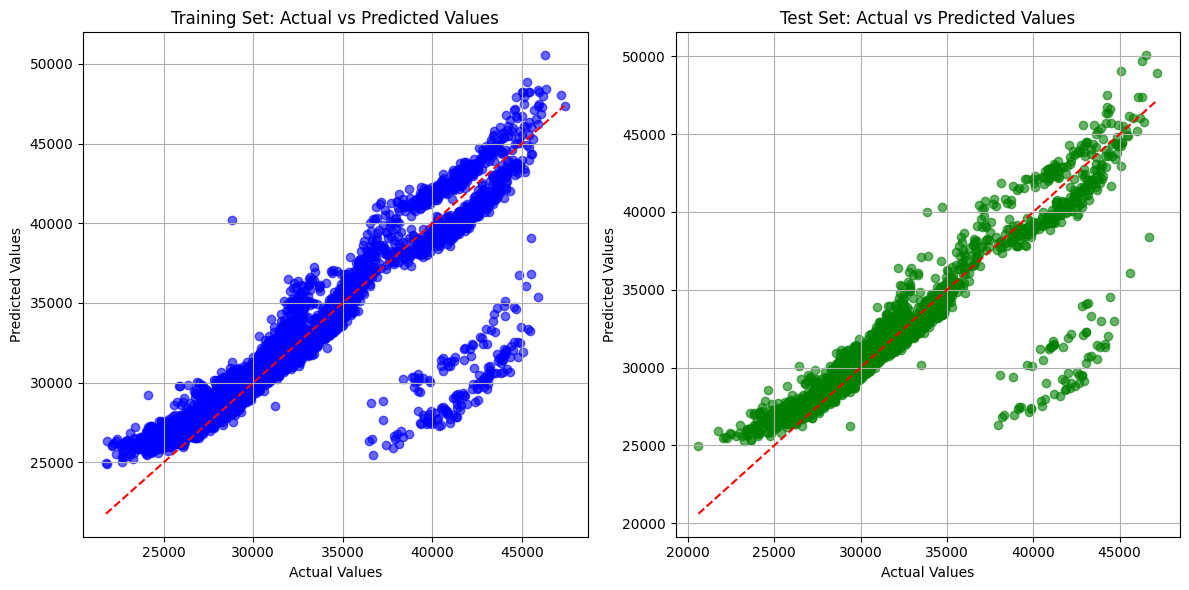

In [ ]:
#Create DataFrame for training set
train_results_df = X_train.copy()
train_results_df['Actual'] = y_train.values
train_results_df['Predicted'] = sm_predictions_train

#Create DataFrame for test set
test_results_df = X_test.copy()
test_results_df['Actual'] = y_test.values
test_results_df['Predicted'] = sm_predictions_test

#Plot Actual vs Predicted for training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(train_results_df['Actual'], train_results_df['Predicted'], alpha=0.6, color='b')
plt.plot([train_results_df['Actual'].min(), train_results_df['Actual'].max()], [train_results_df['Actual'].min(), train_results_df['Actual'].max()], color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Set: Actual vs Predicted Values')
plt.grid(True)

#Plot Actual vs Predicted for test set
plt.subplot(1, 2, 2)
plt.scatter(test_results_df['Actual'], test_results_df['Predicted'], alpha=0.6, color='g')
plt.plot([test_results_df['Actual'].min(), test_results_df['Actual'].max()], [test_results_df['Actual'].min(), test_results_df['Actual'].max()], color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: Actual vs Predicted Values')
plt.grid(True)

plt.tight_layout()
plt.show()


## Residual Analysis

In [ ]:
# Calculate residuals for the training set
residuals_train = y_train - sm_predictions_train

# Calculate residuals for the test set
residuals_test = y_test - sm_predictions_test

# Residuals vs Fitted Values plot for the training set
fig_train = px.scatter(x=sm_predictions_train, y=residuals_train,
                       labels={'x': 'Fitted Values', 'y': 'Residuals'},
                       title='Training Set: Residuals vs Fitted Values')
fig_train.add_hline(y=0, line_dash="dash", line_color="red")
fig_train.show()

# Residuals vs Fitted Values plot for the test set
fig_test = px.scatter(x=sm_predictions_test, y=residuals_test,
                      labels={'x': 'Fitted Values', 'y': 'Residuals'},
                      title='Test Set: Residuals vs Fitted Values')
fig_test.add_hline(y=0, line_dash="dash", line_color="red")
fig_test.show()


Residulas are

In [ ]:
# Assuming you have already fitted your linear regression model
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

# Calculate Durbin-Watson statistic
durbin_watson_stat = sm.stats.stattools.durbin_watson(model.resid)

print(f'Durbin-Watson statistic: {durbin_watson_stat}')


Durbin-Watson statistic: 2.014224172427474


In [ ]:
fig = px.histogram(residuals_test, nbins=30, title='Histogram of Residuals (After Removing Non-Significant Variables)', marginal="box")
fig.update_layout(xaxis_title='Residuals', yaxis_title='Frequency')
fig.show()

The histogram of residuals for the test set indicates that while the residuals are generally centered around zero, suggesting that the model's predictions are on average close to the actual values, the presence of long tails on both sides highlights significant outliers and deviations from normality, which may impact the model's performance and assumptions.

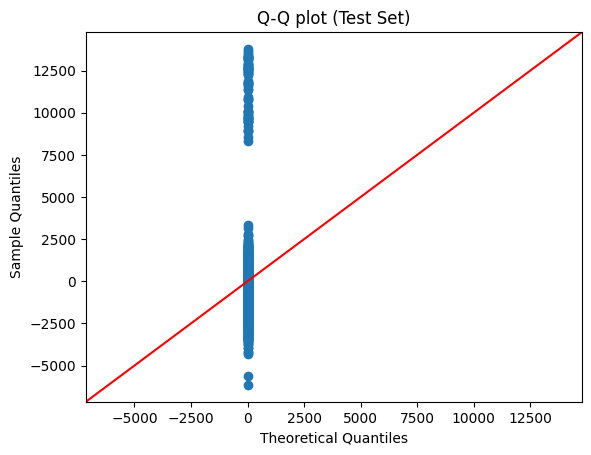

In [ ]:
sm.qqplot(residuals_test, line='45')
plt.title('Q-Q plot (Test Set)')
plt.show()

The Q-Q plot (Quantile-Quantile plot)suggests that your residuals are not normally distributed. In an ideal Q-Q plot for normally distributed residuals, the points should lie approximately along the red 45-degree line.

Save the results

In [ ]:
# Define the output directory and file name for the results
results_file_path = output_dir + "/model_results.csv"

# Save the DataFrame to a CSV file
train_results_df.to_csv(results_file_path, index=False)
test_results_df.to_csv(results_file_path, index=False)

print("Results saved successfully.")

Results saved successfully.


Save the model

In [ ]:
# Define and fit your model
sm_model = sm.OLS(y_train, X_train_sm).fit()

# Save the model
with open('/content/drive/Shared drives/Deloitte/Model/model.pkl', 'wb') as file:
    pickle.dump(sm_model, file)

print("Model saved successfully.")

Model saved successfully.


### Decision Tree

#### Decision Trees with Grid Search

In [ ]:
X = df.drop(columns=['sales_amount']).astype(float)
y = df['sales_amount'].astype(float)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,               # arrays or matrices I want to split
    test_size=0.3,      # the proportion to data for testing
    random_state=123,   # can be any number. make the split reproducibile
    shuffle=True,       # if we want to shuffle data before splitting
    stratify=None       # It is only applied to classification problems. Split data stratifying the target variable
)

In [ ]:
# Define parameter grid
param_grid_dt = {
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 10),
}

# Initialize Decision Tree Regressor with Grid Search
tree = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=3, verbose=2)
tree.fit(X_train, y_train)
print("Best params for Decision Tree Grid Search: ", tree.best_params_)

# Train Decision Tree Regressor with the best parameters
tree_pruned = DecisionTreeRegressor(
    max_depth=tree.best_params_["max_depth"],
    min_samples_split=tree.best_params_["min_samples_split"],
    min_samples_leaf=tree.best_params_["min_samples_leaf"],
    criterion="friedman_mse"
)
tree_pruned.fit(X_train, y_train)

# Predict on the training and test data
predictions_train_pruned = tree_pruned.predict(X_train)
predictions_test_pruned = tree_pruned.predict(X_test)


Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, min_samples

In [ ]:
# Evaluate the model on training data
mae_train_dt = mean_absolute_error(y_train, predictions_train_pruned)
mse_train_dt = mean_squared_error(y_train, predictions_train_pruned)
rmse_train_dt = np.sqrt(mse_train_dt)
r2_train_dt = r2_score(y_train, predictions_train_pruned)

# Evaluate the model on test data
mae_test_dt = mean_absolute_error(y_test, predictions_test_pruned)
mse_test_dt = mean_squared_error(y_test, predictions_test_pruned)
rmse_test_dt = np.sqrt(mse_test_dt)
r2_test_dt = r2_score(y_test, predictions_test_pruned)

print("Decision Tree Performance:")
print(f"Train MAE: {mae_train_dt:.2f}, MSE: {mse_train_dt:.2f}, RMSE: {rmse_train_dt:.2f}, R-squared: {r2_train_dt:.2%}")
print(f"Test MAE: {mae_test_dt:.2f}, MSE: {mse_test_dt:.2f}, RMSE: {rmse_test_dt:.2f}, R-squared: {r2_test_dt:.2%}")

Decision Tree Performance:
Train MAE: 748.46, MSE: 3150587.50, RMSE: 1774.99, R-squared: 87.24%
Test MAE: 774.53, MSE: 3033564.86, RMSE: 1741.71, R-squared: 87.20%


Feature Importance

In [ ]:
# Extract the best estimator from the grid search
best_tree_model = tree.best_estimator_

# Extract feature importances
feature_importances = best_tree_model.feature_importances_

# Assuming you have a list of feature names corresponding to X_train columns
feature_names = X_train.columns

# Create a pandas DataFrame to view the feature importances for better readability
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Create an interactive bar plot using plotly
fig = px.bar(
    feature_importance_df,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Feature Importance',
    category_orders={'Feature': feature_importance_df['Feature'].tolist()}  # Ensuring the sorted order is maintained
)

# Show the plot
fig.show()


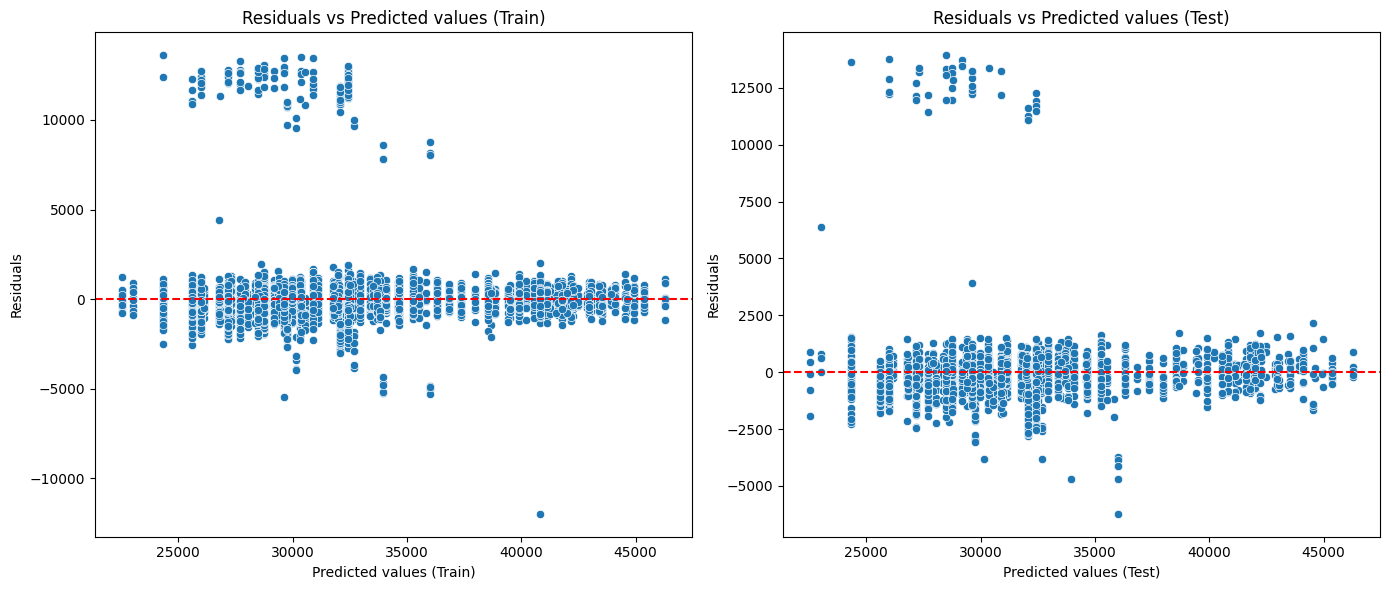

In [ ]:
# Calculate residuals
residuals_train = y_train - predictions_train_pruned
residuals_test = y_test - predictions_test_pruned

# Plot residuals for training set
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=predictions_train_pruned, y=residuals_train)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values (Train)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values (Train)')

# Plot residuals for test set
plt.subplot(1, 2, 2)
sns.scatterplot(x=predictions_test_pruned, y=residuals_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values (Test)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values (Test)')

plt.tight_layout()
plt.show()


The training data residuals exhibit a wider spread and more extreme outliers compared to the test data residuals. This pattern indicates potential overfitting, where the model fits the training data too closely, capturing noise and outliers that do not generalize well to unseen data.

### Random Forest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)

#Train the model
rf_model.fit(X_train, y_train)

#Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)


In [ ]:
#Evaluate the model
mae_train_rf = mean_absolute_error(y_train, y_pred_train)
mse_train_rf = mean_squared_error(y_train, y_pred_train)
rmse_train_rf = np.sqrt(mse_train)
r2_train_rf = r2_score(y_train, y_pred_train)

mae_test_rf = mean_absolute_error(y_test, y_pred_test)
mse_test_rf = mean_squared_error(y_test, y_pred_test)
rmse_test_rf = np.sqrt(mse_test)
r2_test_rf = r2_score(y_test, y_pred_test)

print(f"Train MAE: {mae_train_rf:.2f}, MSE: {mse_train_rf:.2f}, RMSE: {rmse_train_rf:.2f}, R-squared: {r2_train_rf:.2f}")
print(f"Test MAE: {mae_test_rf:.2f}, MSE: {mse_test_rf:.2f}, RMSE: {rmse_test_rf:.2f}, R-squared: {r2_test_rf:.2f}")

Train MAE: 488.59, MSE: 1878455.38, RMSE: 2155.60, R-squared: 0.92
Test MAE: 624.90, MSE: 2858825.15, RMSE: 2085.66, R-squared: 0.88


In [ ]:
# Extract the best estimator from the grid search
best_tree_model = tree.best_estimator_

# Extract feature importances
feature_importances = best_tree_model.feature_importances_

# Assuming you have a list of feature names corresponding to X_train columns
feature_names = X_train.columns

# Create a pandas DataFrame to view the feature importances for better readability
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)  # Sort by importance descending

# Create an interactive bar plot using plotly
fig = px.bar(
    feature_importance_df,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Feature Importance',
    category_orders={'Feature': feature_importance_df['Feature'].tolist()}  # Ensuring the sorted order is maintained
)

# Show the plot
fig.show()


Text(0.5, 1.0, 'Residuals vs Predicted values (Test)')

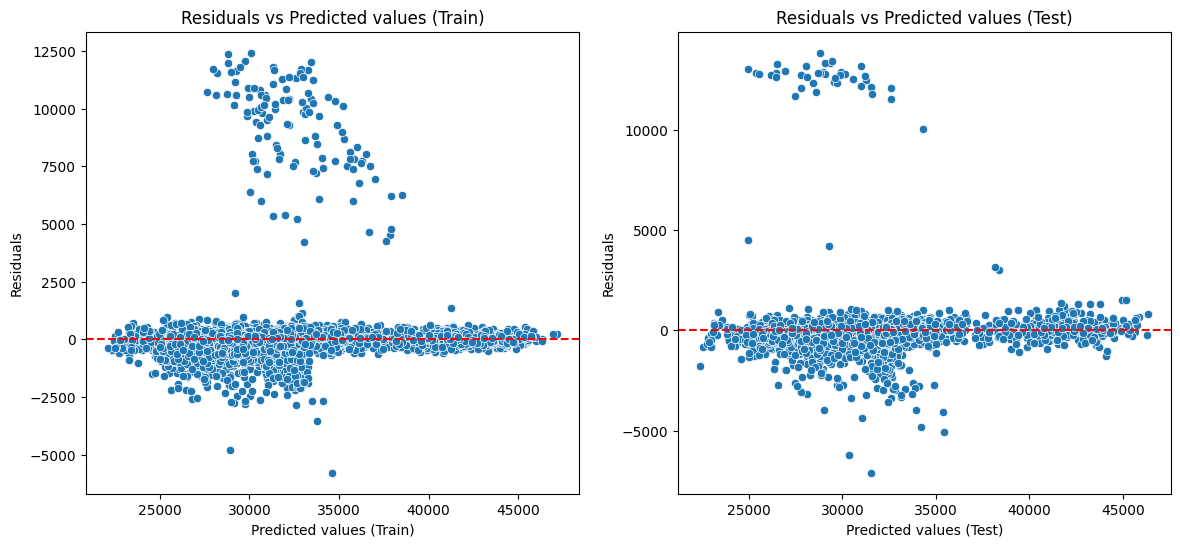

In [ ]:
# Calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# Plot residuals for training and test sets
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_train, y=residuals_train)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values (Train)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values (Train)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_test, y=residuals_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values (Test)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values (Test)')



Both the training and test residuals are centered around zero, indicating that the model generally captures the central tendency of the data well.
However, there are significant outliers in both plots, especially at higher predicted values, suggesting that the model struggles with certain data points.

The residuals for the training data exhibit a wider spread compared to the test data, particularly at higher predicted values. This pattern suggests potential overfitting, where the model fits the training data too closely, capturing noise and outliers that do not generalize well to unseen data.

We decided to train more complex models, such as decision tree and random forest, to see if they could improved our based line, however, we decided to used the linear regression model to predict the sales of our potential customers.

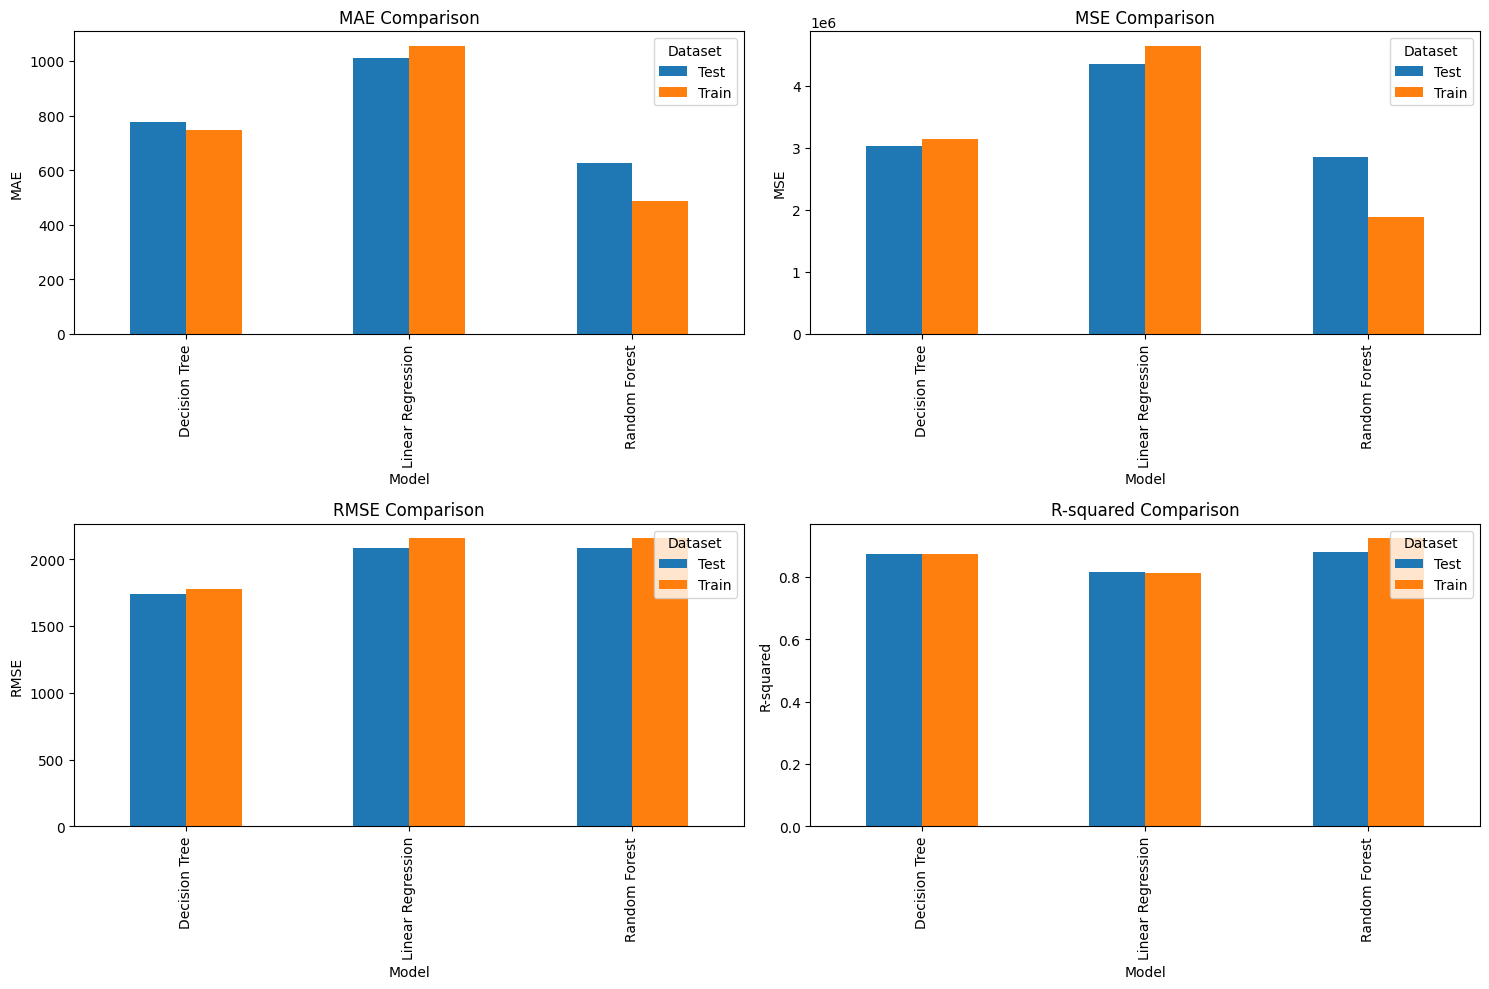

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# results
results = {
    'Model': ['Linear Regression', 'Linear Regression', 'Decision Tree', 'Decision Tree', 'Random Forest', 'Random Forest'],
    'Dataset': ['Train', 'Test', 'Train', 'Test', 'Train', 'Test'],
    'MAE': [mae_train_sig, mae_test_sig, mae_train_dt, mae_test_dt, mae_train_rf, mae_test_rf],
    'MSE': [mse_train_sig, mse_test_sig, mse_train_dt, mse_test_dt, mse_train_rf, mse_test_rf],
    'RMSE': [rmse_train_sig, rmse_test_sig, rmse_train_dt, rmse_test_dt, rmse_train_rf, rmse_test_rf],
    'R-squared': [r2_train_sig, r2_test_sig, r2_train_dt, r2_test_dt, r2_train_rf, r2_test_rf]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Create Pivot Table
pivot_mae = results_df.pivot_table(values="MAE", index="Model", columns="Dataset")
pivot_mse = results_df.pivot_table(values="MSE", index="Model", columns="Dataset")
pivot_rmse = results_df.pivot_table(values="RMSE", index="Model", columns="Dataset")
pivot_r2 = results_df.pivot_table(values="R-squared", index="Model", columns="Dataset")

# Draw graphs
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# MAE
pivot_mae.plot(kind='bar', ax=axes[0, 0], title='MAE Comparison')
axes[0, 0].set_ylabel('MAE')

# MSE
pivot_mse.plot(kind='bar', ax=axes[0, 1], title='MSE Comparison')
axes[0, 1].set_ylabel('MSE')

# RMSE
pivot_rmse.plot(kind='bar', ax=axes[1, 0], title='RMSE Comparison')
axes[1, 0].set_ylabel('RMSE')

# R-squared
pivot_r2.plot(kind='bar', ax=axes[1, 1], title='R-squared Comparison')
axes[1, 1].set_ylabel('R-squared')

plt.tight_layout()
plt.show()
